In [1]:
import os
os.chdir("/content/drive/MyDrive/Projects/Pakkanodi Assignments/TV News channel dataset")

input_folder = "data/"
output_folder = "processed_data/"

channels = ["BBC", "CNN", "TIMESNOW", "CNNIBN", "NDTV"]
channel = channels[0]

import pandas as pd
import numpy as np

df = pd.read_csv(r""+output_folder+channel+"/"+channel+'.csv')

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = df.iloc[:,2:].to_numpy(), df.target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(11340, 230) (3544, 230) (2836, 230)
(11340,) (3544,) (2836,)


## XGBoost

In [3]:
# from numpy import loadtxt
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # fit model no training data
# model = XGBClassifier()
# model.fit(X_train, y_train)
# # make predictions for test data
# y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]
# # evaluate predictions
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

## SK learn Bagging classifier

In [4]:
# from sklearn.svm import SVC
# from sklearn.ensemble import BaggingClassifier
# from sklearn.datasets import make_classification
# # X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
# clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0).fit(X_train, y_train)
# clf.predict(X_val)
# # array([1])

## Voting Classifier

In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifierCV, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


clf1 = LogisticRegression(penalty='l2',)
clf2 = LogisticRegression(penalty='l2', solver='saga')
clf3 = LogisticRegression(penalty='l1', solver='liblinear')
clf4 = LogisticRegression(penalty='l1', solver='liblinear')
clf5 = RandomForestClassifier(n_estimators=15, 
                              max_depth=10,
                              random_state=1)
clf6 = RandomForestClassifier(n_estimators=20, 
                              max_depth=20,
                              random_state=1)
clf7 = RandomForestClassifier(n_estimators=25, 
                              max_depth=30,
                              random_state=1)
clf8 = RandomForestClassifier(n_estimators=15, 
                              max_depth=10,
                              random_state=1)
clf9 = RandomForestClassifier(n_estimators=20, 
                              max_depth=20,
                              random_state=1)
clf10 = RandomForestClassifier(n_estimators=25, 
                              max_depth=30,
                              random_state=1)
clf11 = RandomForestClassifier(n_estimators=15, 
                              max_depth=10,
                              random_state=1)
clf12 = RandomForestClassifier(n_estimators=20, 
                              max_depth=10,
                              random_state=1)
clf13 = KNeighborsClassifier(n_neighbors=5,
                            weights='uniform', 
                            algorithm='auto', 
                            metric='euclidean')
clf14 = KNeighborsClassifier(n_neighbors=7, 
                            weights='uniform', 
                            algorithm='ball_tree', 
                            metric='euclidean')
clf15 = KNeighborsClassifier(n_neighbors=9, 
                            weights='uniform', 
                            algorithm='brute', 
                            metric='minkowski')
clf16 = KNeighborsClassifier(n_neighbors=5, 
                            weights='distance', 
                            algorithm='ball_tree', 
                            metric='manhattan')
clf17 = KNeighborsClassifier(n_neighbors=7, 
                            weights='distance', 
                            algorithm='auto', 
                            metric='minkowski')
clf18 = KNeighborsClassifier(n_neighbors=3, 
                            weights='distance', 
                            algorithm='auto', 
                            metric='manhattan')
clf19 = RidgeClassifierCV(alphas=(0.1, 1.0), 
						fit_intercept=True)
clf20 = RidgeClassifierCV(alphas=(0.1, 1.0), 
						fit_intercept=True)
clf21 = RidgeClassifier(alpha=1.0,
						fit_intercept=True)
clf22 = RidgeClassifier(alpha=0.1,
						fit_intercept=True)


ensemble = VotingClassifier(estimators=[('LogisticRegression1', clf1), 
                                     ('LogisticRegression2', clf2), 
                                     ('LogisticRegression3', clf3), 
                                     ('LogisticRegression4', clf4), 
                                     ('RandomForestClassifier1', clf5), 
                                     ('RandomForestClassifier2', clf6), 
                                     ('RandomForestClassifier3', clf7), 
                                     ('RandomForestClassifier4', clf8), 
                                     ('RandomForestClassifier5', clf9), 
                                     ('RandomForestClassifier6', clf10), 
                                     ('RandomForestClassifier7', clf11), 
                                     ('RandomForestClassifier8', clf12), 
                                     ('KNeighborsClassifier1', clf13), 
                                     ('KNeighborsClassifier2', clf14), 
                                     ('KNeighborsClassifier3', clf15), 
                                     ('KNeighborsClassifier4', clf16), 
                                     ('KNeighborsClassifier5', clf17), 
                                     ('KNeighborsClassifier6', clf18), 
                                     ('RidgeClassifierCV1', clf19), 
                                     ('RidgeClassifierCV2', clf20), 
                                     ('RidgeClassifier1', clf21), 
                                     ('RidgeClassifier2', clf22)
                                    ], 
                         voting='hard')
ensemble = ensemble.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [6]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

ensemble_predictions = ensemble.predict(X_val)

print(classification_report(y_val, ensemble_predictions),'\n\n')
print("Confusion matrix: \n",confusion_matrix(y_val, ensemble_predictions))

              precision    recall  f1-score   support

          -1       0.82      0.92      0.87      1490
           1       0.90      0.78      0.83      1346

    accuracy                           0.85      2836
   macro avg       0.86      0.85      0.85      2836
weighted avg       0.86      0.85      0.85      2836
 


Confusion matrix: 
 [[1369  121]
 [ 300 1046]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


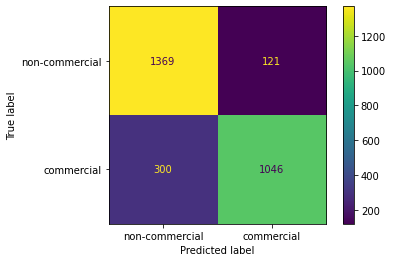

In [7]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(ensemble, X_val, y_val, display_labels=['non-commercial','commercial'])

# Comparing single models with Ensemble

# Ensemble model

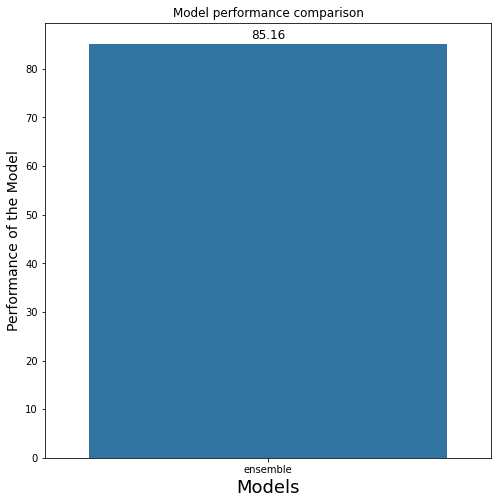

In [8]:
# Importing libraries for dataframe creation
# and graph plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating our own dataframe
accuracy_results = {"Model Names" : ['ensemble'],
        "Accuracy": [accuracy_score(ensemble_predictions, y_val)*100]}
# Now convert this dictionary type data into a pandas dataframe
# specifying what are the column names
accuracy_results = pd.DataFrame(accuracy_results, columns=['Model Names', 'Accuracy'])

# Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Model Names", y="Accuracy", data=accuracy_results)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Models", size=18)
 
# Setting the label for y-axis
plt.ylabel("Performance of the Model", size=14)

# Setting the title for the graph
plt.title("Model performance comparison")

# Finally showing the plot
plt.show()

## Single models

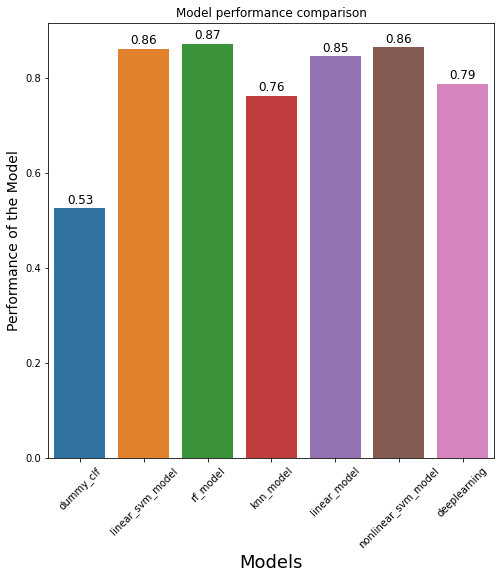